In [7]:
%matplotlib inline

In [1]:
import serial, threading, sys, time
sys.path.append('/home/pi/Desktop/ADR_NX/Utils')
sys.path.append('/home/pi/Desktop/ADR_NX/Mainframe')
from adr_PID import ADR_PID
import adr_utils, SIM900_controller, SIM922
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from HCLib import HeaterController

In [2]:
db = False
HC = HeaterController.HeaterController()
HC.debug = db
HC.establish_comms()

In [3]:
mfc = SIM900_controller.SIM900()
mfc.debug = db
mfc.init_and_open_connection()
mfc.start_input_loop()
mfc.start_output_loop()
s922 = SIM922.SIM922(mfc,'s922',debug=True);
mfc.set_RPER([s922.MODNUM])

Input loop started
Output loop started


In [25]:
temps, times, dcs = ([] for i in range(3))
s = timer()
top = 5.0
bot = 0.0
global errmsg 
#HC.set_onoff(1)

s922.dbg = False
s922.start_data_stream(2)
try:
    for i in list(np.linspace(bot,top,num=120)):
        s2 = timer()
        #HC.set_dutycycle(i)
        while timer()-s2 < 300.0:
            s922.newdataevent.clear()
            s922.newdataevent.wait(5)
            s922.newdataevent.clear()
            temp = s922.lastvalues[1]
            tm = s922.lastdatatimes[1]
            #print("|{:4f}|{:6.3f}|{:8f}".format(i,temp,tm-s))
            dcs.append(i); temps.append(temp); times.append(tm-s); 
            
            sys.stdout.flush()
            sys.stderr.flush()
            try:
                print s922.excq.get_nowait()
                print "OOPS!"
            except:
                #print "No exceptions!"
                pass
            time.sleep(5)
        print("|{:4f}|{:6.3f}|{:8f}".format(i,temp,tm-s))
except Exception as e:
    print e
finally:          
    s922.stop_data_stream()
    s922.flush_queue()
    HC.set_onoff(0)
    HC.set_dutycycle(0)

HI
Bad message payload length - msg:|'5.414000E+00'| len:|12| (want |10|)
Bad message payload length - msg:|'5.80'| len:|4| (want |2|)
|0.000000| 5.899|297.066704
Bad message payload length - msg:|'5.973000'| len:|8| (want |6|)
Bad message payload length - msg:|'6.363000E+00'| len:|12| (want |10|)
|0.042017| 6.726|599.469346
Bad message payload length - msg:|'6.762000'| len:|8| (want |6|)
Bad message payload length - msg:|'6.831000'| len:|8| (want |6|)
Bad message payload length - msg:|'6.950000'| len:|8| (want |6|)
Bad message payload length - msg:|'7.290000'| len:|8| (want |6|)
Bad message payload length - msg:|'7.469000E+00'| len:|12| (want |10|)
|0.084034| 7.531|901.869174
Bad message payload length - msg:|'7.96'| len:|4| (want |2|)
|0.126050| 8.286|1204.271064
Bad message payload length - msg:|'8.352000E+00'| len:|12| (want |10|)
Bad message payload length - msg:|'8.496000E+00'| len:|12| (want |10|)
Bad message payload length - msg:|'8.587000E+00'| len:|12| (want |10|)
Bad message

/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |1000.0|'1000E+00'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.168067| 9.051|1506.666198
Bad message payload length - msg:|'9.298000'| len:|8| (want |6|)
Bad message payload length - msg:|'9.446000'| len:|8| (want |6|)
Bad message payload length - msg:|'9.606000'| len:|8| (want |6|)
Bad message payload length - msg:|'9.773000'| len:|8| (want |6|)
|0.210084| 9.805|1809.066337
|0.252101|10.567|2111.466778
Bad message payload length - msg:|'1.09'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |73000.0|'7300E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'1.118000E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'1.12'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |29000.0|'2900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'1.17'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |40000.0|'4000E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.294118|11.733|2413.857111
|0.336134|13.456|2716.263072
Bad message payload length - msg:|'1.482400E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'1.52'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |26000.0|'2600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'1.577200'| len:|8| (want |6|)
Bad message payload length - msg:|'1.601600'| len:|8| (want |6|)
|0.378151|16.145|3018.658356
Bad message payload length - msg:|'1.64'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |22000.0|'2200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'1.69'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |35000.0|'3500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'1.845800E+01'| len:|12| (want |10|)
|0.420168|18.431|3321.064230
Bad message payload length - msg:|'1.861400'| len:|8| (want |6|)
Bad message payload length - msg:|'1.919400E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'1.97'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |4000.0|'0400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'2.012800'| len:|8| (want |6|)
|0.462185|20.274|3623.458121
|0.504202|21.492|3925.865863
Bad message payload length - msg:|'2.165100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.168100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.189800'| len:|8| (want |6|)
Bad message payload length - msg:|'2.234400'| len:|8| (want |6|)
|0.546218|22.352|4228.256356
Bad message payload length - msg:|'2.294100E+01'| len:|12| (want |10|)
|0.588235|23.100|4530.659638
Bad message payload length - msg:|'2.311700E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.327500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.341400'| len:|8| (want |6|)
Bad message payload length - msg:|'2.375800E+01'| len:|12| (want |10|)
|0.630252|23.811|4833.057988
Bad message payload length - msg:|'2.420700'| len:|8| (want |6|)
|0.672269|24.460|5135.452044
Bad message payload length - msg:|'2.468700'| len:|8| (want |6|)
Bad messag

/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |94000.0|'9400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.714286|25.012|5437.857341
Bad message payload length - msg:|'2.561200E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.565500'| len:|8| (want |6|)
|0.756303|25.688|5740.249145
Bad message payload length - msg:|'2.591600'| len:|8| (want |6|)
Bad message payload length - msg:|'2.59'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |89000.0|'8900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.798319|26.308|6042.648569
Bad message payload length - msg:|'2.65'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |57000.0|'5700E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.840336|26.927|6345.048470
Bad message payload length - msg:|'2.73'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |9000.0|'0900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|0.882353|27.571|6647.446800
Bad message payload length - msg:|'2.76'| len:|4| (want |2|)
Bad message payload length - msg:|'2.76'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |32000.0|'3200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'2.78'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |31000.0|'3100E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'2.786100'| len:|8| (want |6|)
Bad message payload length - msg:|'2.788600'| len:|8| (want |6|)
|0.924370|28.190|6949.842129
Bad message payload length - msg:|'2.823900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.83'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |70000.0|'7000E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'2.83'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |75000.0|'7500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'2.876100'| len:|8| (want |6|)
|0.966387|28.810|7252.239013
Bad message payload length - msg:|'2.90'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |46000.0|'4600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.008403|29.420|7554.644398
Bad message payload length - msg:|'2.992300E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'2.992900E+01'| len:|12| (want |10|)
|1.050420|30.016|7857.043302
Bad message payload length - msg:|'3.059800E+01'| len:|12| (want |10|)
|1.092437|30.617|8159.447882
Bad message payload length - msg:|'3.06'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |48000.0|'4800E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'3.084700'| len:|8| (want |6|)
|1.134454|31.212|8461.852935
Bad message payload length - msg:|'3.17'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |96000.0|'9600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.176471|31.807|8764.244752
Bad message payload length - msg:|'3.21'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |16000.0|'1600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.218487|32.404|9066.648488
Bad message payload length - msg:|'3.246300'| len:|8| (want |6|)
Bad message payload length - msg:|'3.297700E+01'| len:|12| (want |10|)
|1.260504|32.991|9369.039361
Bad message payload length - msg:|'3.304700'| len:|8| (want |6|)
Bad message payload length - msg:|'3.318400'| len:|8| (want |6|)
|1.302521|33.576|9671.442008
Bad message payload length - msg:|'3.372100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.40'| len:|4| (want |2|)
|1.344538|34.145|9973.842201
Bad message payload length - msg:|'3.417000E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.46'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |55000.0|'5500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'3.470000'| len:|8| (want |6|)
Bad message payload length - msg:|'3.47'| len:|4| (want |2|)
Bad message payload length - msg:|'1300'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |1300.0|'1300'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.386555|34.703|10276.241091
Bad message payload length - msg:|'3.484400E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.48'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |54000.0|'5400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'3.510100'| len:|8| (want |6|)
Bad message payload length - msg:|'3.520600'| len:|8| (want |6|)
|1.428571|35.247|10578.631118
Bad message payload length - msg:|'3.525900'| len:|8| (want |6|)
Bad message payload length - msg:|'3.527900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.56'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |93000.0|'9300E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.470588|35.785|10881.036670
Bad message payload length - msg:|'3.602300'| len:|8| (want |6|)
Bad message payload length - msg:|'3.60'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |39000.0|'3900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'3.62'| len:|4| (want |2|)
Bad message payload length - msg:|'1400'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |1400.0|'1400'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.512605|36.319|11183.434841
Bad message payload length - msg:|'3.653000'| len:|8| (want |6|)
Bad message payload length - msg:|'3.655600'| len:|8| (want |6|)
Bad message payload length - msg:|'3.667100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.667600E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'3.67'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |72000.0|'7200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.554622|36.848|11485.833546
Bad message payload length - msg:|'3.687900E+01'| len:|12| (want |10|)
|1.596639|37.378|11788.236969
Bad message payload length - msg:|'3.759500'| len:|8| (want |6|)
Bad message payload length - msg:|'3.767500'| len:|8| (want |6|)
|1.638655|37.910|12090.634197
|1.680672|38.446|12393.032788
|1.722689|38.991|12695.423764
Bad message payload length - msg:|'3.92'| len:|4| (want |2|)
Bad message payload length - msg:|'3.95'| len:|4| (want |2|)
|1.764706|39.547|12997.828710
Bad message payload length - msg:|'3.98'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |42000.0|'4200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|1.806723|40.121|13300.228546
Bad message payload length - msg:|'4.021800'| len:|8| (want |6|)
Bad message payload length - msg:|'4.028900'| len:|8| (want |6|)
Bad message payload length - msg:|'4.03'| len:|4| (want |2|)
|1.848739|40.713|13602.629970
|1.890756|41.329|13905.027851
Bad message payload length - msg:|'4.141500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.143000E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.167300E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.18'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |6000.0|'0600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.191100'| len:|8| (want |6|)
Bad message payload length - msg:|'4.196900'| len:|8| (want |6|)
|1.932773|41.961|14207.420241
Bad message payload length - msg:|'4.20'| len:|4| (want |2|)
Bad message payload length - msg:|'6900'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |6900.0|'6900'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.21'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |69000.0|'6900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.244500'| len:|8| (want |6|)
Bad message payload length - msg:|'4.261200E+01'| len:|12| (want |10|)
|1.974790|42.617|14509.826189
|2.016807|43.288|14812.225195
Bad message payload length - msg:|'4.36'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |76000.0|'7600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.058824|43.981|15114.617436
Bad message payload length - msg:|'4.43'| len:|4| (want |2|)
Bad message payload length - msg:|'7100'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |7100.0|'7100'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.44'| len:|4| (want |2|)
Bad message payload length - msg:|'8000'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |8000.0|'8000'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.100840|44.693|15417.019915
Bad message payload length - msg:|'4.482100'| len:|8| (want |6|)
Bad message payload length - msg:|'4.50'| len:|4| (want |2|)
Bad message payload length - msg:|'4.518600'| len:|8| (want |6|)
Bad message payload length - msg:|'4.524000'| len:|8| (want |6|)
Bad message payload length - msg:|'4.54'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |5000.0|'0500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.142857|45.419|15719.419587
Bad message payload length - msg:|'4.572800E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.605300'| len:|8| (want |6|)
|2.184874|46.160|16021.823831
Bad message payload length - msg:|'4.623600E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.62'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |99000.0|'9900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.226891|46.907|16324.212845
Bad message payload length - msg:|'4.701300E+01'| len:|12| (want |10|)
|2.268908|47.662|16626.615660
Bad message payload length - msg:|'4.778600E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.80'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |2000.0|'0200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.805600'| len:|8| (want |6|)
Bad message payload length - msg:|'4.84'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |37000.0|'3700E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.310924|48.422|16929.012922
Bad message payload length - msg:|'4.86'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |97000.0|'9700E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.89'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |3000.0|'0300E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.89'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |25000.0|'2500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'4.897600'| len:|8| (want |6|)
|2.352941|49.196|17231.410620
Bad message payload length - msg:|'4.94'| len:|4| (want |2|)
Bad message payload length - msg:|'4.940700E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'4.957700'| len:|8| (want |6|)
Bad message payload length - msg:|'4.961300'| len:|8| (want |6|)
Bad message payload length - msg:|'4.99'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |11000.0|'1100E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.394958|49.947|17533.808634
Bad message payload length - msg:|'4.998800'| len:|8| (want |6|)
Bad message payload length - msg:|'5.057400E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'5.06'| len:|4| (want |2|)
Bad message payload length - msg:|'7600'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |7600.0|'7600'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'5.06'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |86000.0|'8600E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.436975|50.708|17836.219286
|2.478992|51.468|18138.617013
|2.521008|52.224|18441.008392
|2.563025|52.975|18743.403562
Bad message payload length - msg:|'5.340300'| len:|8| (want |6|)
Bad message payload length - msg:|'5.357300E+01'| len:|12| (want |10|)
|2.605042|53.725|19045.804286
Bad message payload length - msg:|'5.389400E+01'| len:|12| (want |10|)
|2.647059|54.468|19348.199316
Bad message payload length - msg:|'5.45'| len:|4| (want |2|)
Bad message payload length - msg:|'5.457900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'5.466900'| len:|8| (want |6|)
Bad message payload length - msg:|'5.469500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'5.516200E+01'| len:|12| (want |10|)
|2.689076|55.205|19650.606423
Bad message payload length - msg:|'5.579100'| len:|8| (want |6|)
|2.731092|55.937|19953.004488
Bad message payload length - msg:|'5.61'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |67000.0|'6700E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|2.773109|56.661|20255.402922
|2.815126|57.380|20557.796325
Bad message payload length - msg:|'5.739600E+01'| len:|12| (want |10|)
|2.857143|58.095|20860.205250
Bad message payload length - msg:|'5.855400'| len:|8| (want |6|)
Bad message payload length - msg:|'5.869700E+01'| len:|12| (want |10|)
|2.899160|58.796|21162.600751
|2.941176|59.499|21464.996285
|2.983193|60.190|21767.402943
Bad message payload length - msg:|'6.037500'| len:|8| (want |6|)
Bad message payload length - msg:|'6.087700'| len:|8| (want |6|)
|3.025210|60.873|22069.806016
|3.067227|61.550|22372.196083
Bad message payload length - msg:|'6.16'| len:|4| (want |2|)
|3.109244|62.222|22674.594595
Bad message payload length - msg:|'6.25'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |74000.0|'7400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'6.262100'| len:|8| (want |6|)
Bad message payload length - msg:|'6.270100'| len:|8| (want |6|)
Bad message payload length - msg:|'6.271500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.28'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |64000.0|'6400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|3.151261|62.890|22976.993905
Bad message payload length - msg:|'6.311700E+01'| len:|12| (want |10|)
|3.193277|63.554|23279.396258
Bad message payload length - msg:|'6.40'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |10000.0|'1000E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|3.235294|64.212|23581.794909
Bad message payload length - msg:|'6.429200'| len:|8| (want |6|)
Bad message payload length - msg:|'6.449600'| len:|8| (want |6|)
|3.277311|64.867|23884.196398
Bad message payload length - msg:|'6.509900'| len:|8| (want |6|)
Bad message payload length - msg:|'6.538800E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.54'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |15000.0|'1500E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|3.319328|65.511|24186.595514
Bad message payload length - msg:|'6.558800E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.584500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.58'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |62000.0|'6200E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'6.590800'| len:|8| (want |6|)
|3.361345|66.146|24488.989614
Bad message payload length - msg:|'6.665500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.66'| len:|4| (want |2|)
|3.403361|66.780|24791.385602
Bad message payload length - msg:|'6.722700'| len:|8| (want |6|)
Bad message payload length - msg:|'6.74'| len:|4| (want |2|)
Bad message payload length - msg:|'1300'| len:|4| (want |2|)
|3.445378|67.411|25093.787142
Bad message payload length - msg:|'6.751300'| len:|8| (want |6|)
Bad message payload length - msg:|'6.756300'| len:|8| (want |6|)
Bad message payload length - msg:|'6.771200'| len:|8| (want |6|)
|3.487395|68.040|25396.188630
Bad message payload length - msg:|'6.806700E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'6.850600'| len:|8| (want |6|)
|3.529412|68.661|25698.583861
Bad message payload length - msg:|'6.912000'| len:|8| (want |6|)
Bad message payload length - msg:|'6.913500'| len:|8| (want |6|)
Bad m

/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |78000.0|'7800E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'7.164800'| len:|8| (want |6|)
|3.739496|71.710|27210.587533
|3.781513|72.307|27512.983212
|3.823529|72.903|27815.385896
Bad message payload length - msg:|'7.29'| len:|4| (want |2|)
Bad message payload length - msg:|'7.299800'| len:|8| (want |6|)
Bad message payload length - msg:|'7.312600E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.34'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |61000.0|'6100E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|3.865546|73.496|28117.775951
Bad message payload length - msg:|'7.35'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |8000.0|'0800E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'7.356200'| len:|8| (want |6|)
Bad message payload length - msg:|'7.366700E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.36'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |90000.0|'9000E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'7.369900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.37'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |50000.0|'5000E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|3.907563|74.090|28420.170312
Bad message payload length - msg:|'7.41'| len:|4| (want |2|)
Bad message payload length - msg:|'7.425300E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.459700'| len:|8| (want |6|)
|3.949580|74.675|28722.577250
Bad message payload length - msg:|'7.474900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.503900E+01'| len:|12| (want |10|)
|3.991597|75.261|29024.969021
Bad message payload length - msg:|'7.569800E+01'| len:|12| (want |10|)
|4.033613|75.839|29327.371451
Bad message payload length - msg:|'7.595600E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'7.620200'| len:|8| (want |6|)
|4.075630|76.415|29629.763844
Bad message payload length - msg:|'7.648800E+01'| len:|12| (want |10|)
|4.117647|76.990|29932.165865
Bad message payload length - msg:|'7.70'| len:|4| (want |2|)
Bad message payload length - msg:|'7.741000'| len:|8| (want |6|)
|4.159664|77.562|30234.571538
|4.201681|78.129|30536.966962
Bad message paylo

/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |34000.0|'3400E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'7.973900E+01'| len:|12| (want |10|)
|4.327731|79.820|31444.172951
Bad message payload length - msg:|'7.999100'| len:|8| (want |6|)
Bad message payload length - msg:|'8.003100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'8.006500'| len:|8| (want |6|)
|4.369748|80.376|31746.576123
Bad message payload length - msg:|'8.040800'| len:|8| (want |6|)
Bad message payload length - msg:|'8.053100E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'8.075000'| len:|8| (want |6|)
|4.411765|80.929|32048.967263
Bad message payload length - msg:|'8.099500'| len:|8| (want |6|)
Bad message payload length - msg:|'8.131000'| len:|8| (want |6|)
|4.453782|81.480|32351.363782
Bad message payload length - msg:|'8.16'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |41000.0|'4100E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'8.166800E+01'| len:|12| (want |10|)
|4.495798|82.030|32653.769427
Bad message payload length - msg:|'8.24'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |49000.0|'4900E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'8.252800E+01'| len:|12| (want |10|)
|4.537815|82.579|32956.164076
Bad message payload length - msg:|'8.263700'| len:|8| (want |6|)
Bad message payload length - msg:|'8.27'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |53000.0|'5300E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


|4.579832|83.126|33258.554286
Bad message payload length - msg:|'8.321100'| len:|8| (want |6|)
|4.621849|83.673|33560.963405
Bad message payload length - msg:|'8.41'| len:|4| (want |2|)
|4.663866|84.221|33863.357325
Bad message payload length - msg:|'8.431200'| len:|8| (want |6|)
Bad message payload length - msg:|'8.43'| len:|4| (want |2|)
|4.705882|84.764|34165.757980
Bad message payload length - msg:|'8.511200E+01'| len:|12| (want |10|)
|4.747899|85.305|34468.159468
Bad message payload length - msg:|'8.535500E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'8.576300'| len:|8| (want |6|)
|4.789916|85.840|34770.557291
Bad message payload length - msg:|'8.60'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |88000.0|'8800E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'8.613800'| len:|8| (want |6|)
Bad message payload length - msg:|'8.627200E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'8.627300'| len:|8| (want |6|)
|4.831933|86.374|35072.959423
Bad message payload length - msg:|'8.671900E+01'| len:|12| (want |10|)
Bad message payload length - msg:|'8.672000'| len:|8| (want |6|)
|4.873950|86.909|35375.355233
Bad message payload length - msg:|'8.698400'| len:|8| (want |6|)
|4.915966|87.443|35677.751511
|4.957983|87.978|35980.157992
Bad message payload length - msg:|'8.81'| len:|4| (want |2|)
Bad message payload length - msg:|'8.83'| len:|4| (want |2|)


/home/pi/Desktop/ADR_NX/Mainframe/SIM922.py:99: UserWarning: SIM922 WTF TEMP - |33000.0|'3300E+01'|
  warnings.warn("SIM922 WTF TEMP - |{}|{}|".format(valf,repr(val)))


Bad message payload length - msg:|'8.838500'| len:|8| (want |6|)
|5.000000|88.510|36282.548185


In [ ]:
s922.get_single_temperature(4)

In [ ]:
s922.stop_data_stream()

In [ ]:
HC.set_onoff(0)
HC.set_dutycycle(0)

In [ ]:
print ('test', end=" ")

In [ ]:
t1 = [x if x> 8 else 20.0 for x in temps]
t2 = [x if x< 0.2 else 0.170 for x in temps_st]
t2 = [x if x> 0.112 else 0.170 for x in t2]

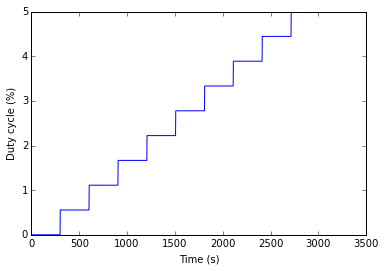

In [10]:
fig = plt.figure()
plt.plot(times,dcs,'-')
plt.xlabel("Time (s)")
plt.ylabel("Duty cycle (%)")
plt.show()

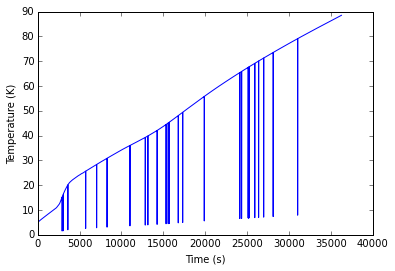

In [26]:
fig = plt.figure()
plt.plot(times,temps,'-')
plt.xlabel("Time (s)")
plt.ylabel("Temperature (K)")
plt.show()

In [27]:
with open("warmup_20170710.txt", "w") as f:
    for i in range(0,len(times)):
        f.write("{} {} {}\n".format(times[i],temps[i],dcs[i]))

In [24]:
HC.set_onoff(1)
HC.set_dutycycle(100)